### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pf

: 

### Ingesting Data

In [ ]:
train = pd.read_csv('datasets/train.csv', index_col='Id')
test =  pd.read_csv('datasets/test.csv', index_col='Id')
data = pd.concat([train, test])
data.head()

: 

### Data Exploration

In [ ]:
data.info()

: 

In [ ]:
data.describe()

: 

In [ ]:
profiler = pf.ProfileReport(data)
report = profiler.report
report

: 

In [5]:
data.std(skipna=True)#.plot()

C:\Users\Mark\AppData\Local\Temp\ipykernel_11100\1227010837.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std(skipna=True)#.plot()


MSSubClass          42.517628
LotFrontage         23.344905
LotArea           7886.996359
OverallQual          1.409947
OverallCond          1.113131
YearBuilt           30.291442
YearRemodAdd        20.894344
MasVnrArea         179.334253
BsmtFinSF1         455.610826
BsmtFinSF2         169.205611
BsmtUnfSF          439.543659
TotalBsmtSF        440.766258
1stFlrSF           392.362079
2ndFlrSF           428.701456
LowQualFinSF        46.396825
GrLivArea          506.051045
BsmtFullBath         0.524736
BsmtHalfBath         0.245687
FullBath             0.552969
HalfBath             0.502872
BedroomAbvGr         0.822693
KitchenAbvGr         0.214462
TotRmsAbvGrd         1.569379
Fireplaces           0.646129
GarageYrBlt         25.574285
GarageCars           0.761624
GarageArea         215.394815
WoodDeckSF         126.526589
OpenPorchSF         67.575493
EnclosedPorch       64.244246
3SsnPorch           25.188169
ScreenPorch         56.184365
PoolArea            35.663946
MiscVal   

### Variable Distribution

In [6]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# grid = sns.FacetGrid(data)
# grid.map_dataframe(sns.histplot)
# plt.savefig('histograms.jpg')

## Missing Data

In [8]:
def check_missing(df=data):
    missing = df.isna().sum()
    missing_data = missing[missing > 0]
    return missing_data

check_missing()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

# Fill Missing Data

### YearBuilt

In [9]:
corr = data[["GarageYrBlt", "YearBuilt"]].corr()
corr

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.834812
YearBuilt,0.834812,1.000000


In [10]:
data["GarageYrBlt"].fillna(data["YearBuilt"],inplace=True)

## LotFrontage

In [11]:
check_missing()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

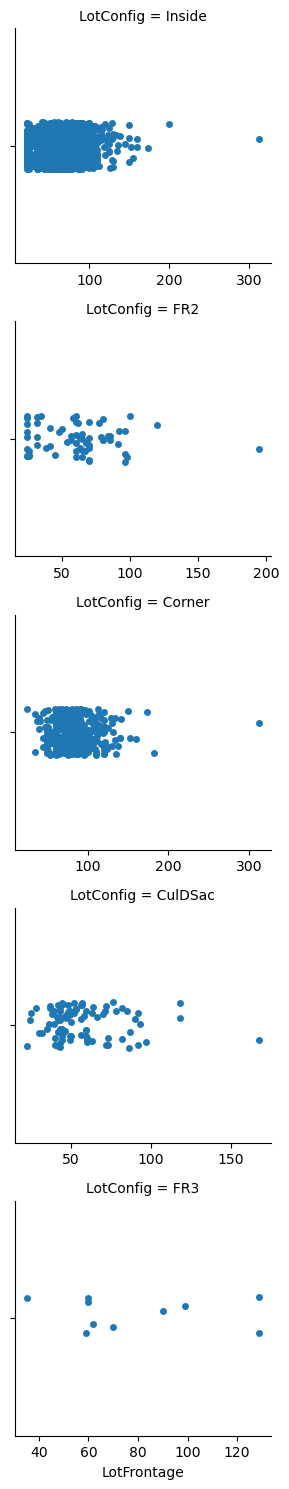

In [12]:
sns.catplot(data=data, x='LotFrontage',kind='strip', row='LotConfig', sharex=False,height=3,orient='portrait')

plt.show()


In [13]:
lot_front_dic = data.mask(data.LotFrontage.isna()) \
            .groupby('LotConfig') \
                ['LotFrontage'].median() \
                .to_dict()

lot_front_dic

{'Corner': 80.0, 'CulDSac': 50.0, 'FR2': 62.0, 'FR3': 66.0, 'Inside': 66.0}

In [14]:
missing_LF = data[data.LotFrontage.isna()]#.fillna(lot_front_dic,inplace=True)
for key, item in lot_front_dic.items():
    data.loc[(data['LotConfig']==key) & (data.LotFrontage.isna())] = item

In [15]:
check_missing()

MSZoning           3
Alley           2248
Utilities          1
Exterior1st        1
Exterior2nd        1
MasVnrType        18
MasVnrArea        17
BsmtQual          68
BsmtCond          69
BsmtExposure      69
BsmtFinType1      66
BsmtFinSF1         1
BsmtFinType2      67
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1244
GarageType       146
GarageFinish     148
GarageCars         1
GarageArea         1
GarageQual       148
GarageCond       148
PoolQC          2424
Fence           1962
MiscFeature     2352
SaleType           1
SalePrice       1232
dtype: int64

# Drop Columns

### Drop 8 rows of ManVnrArea

In [16]:
data.where(data["MasVnrArea"].isna()).dropna(inplace=True)

### Drop categorical columns  with more than 600 missing values

In [17]:
#data.dropna(axis='columns', how='any', thresh= 599)

In [18]:
missing_cat = data.select_dtypes('object').isna().sum()
missing_cat = missing_cat[missing_cat >= 600].index.to_list()
missing_cat

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
data.drop(missing_cat,axis='columns',inplace=True)
data.shape

(2919, 75)

### Drop Columns Dominated by a certain value

In [20]:
unbalanced_cols = []
for col in data.select_dtypes('object').columns:
    value_counts = data[col].value_counts(normalize=True)

    max = value_counts.max()
    
    print(col)
    print(value_counts)
   # print(max)

    if max > .50:
        unbalanced_cols.append(col)


MSZoning
RL         0.630658
RM         0.146091
66.0       0.094307
FV         0.040809
80.0       0.035665
50.0       0.029835
C (all)    0.007888
RH         0.007888
62.0       0.006859
Name: MSZoning, dtype: float64
Street
Pave    0.830079
66.0    0.094210
80.0    0.035629
50.0    0.029805
62.0    0.006852
Grvl    0.003426
Name: Street, dtype: float64
LotShape
Reg     0.591641
IR1     0.221651
66.0    0.094210
80.0    0.035629
50.0    0.029805
IR2     0.016444
62.0    0.006852
IR3     0.003768
Name: LotShape, dtype: float64
LandContour
Lvl     0.750257
66.0    0.094210
HLS     0.037342
80.0    0.035629
Bnk     0.034601
50.0    0.029805
Low     0.011305
62.0    0.006852
Name: LandContour, dtype: float64
Utilities
AllPub    0.833448
66.0      0.094243
80.0      0.035641
50.0      0.029815
62.0      0.006854
Name: Utilities, dtype: float64
LotConfig
Inside     0.637890
Corner     0.139431
66.0       0.094210
80.0       0.035629
CulDSac    0.030490
50.0       0.029805
FR2        0.0222

In [21]:
data.drop(unbalanced_cols,axis='columns',inplace=True)
check_missing()

Exterior1st        1
Exterior2nd        1
MasVnrArea        17
BsmtQual          68
BsmtFinType1      66
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
GarageFinish     148
GarageCars         1
GarageArea         1
SalePrice       1232
dtype: int64

In [22]:
data.dropna(axis=0,inplace=True)
print(data.shape)
check_missing()

(1583, 47)


Series([], dtype: int64)

# Feature Importance

In [23]:
#pd_crosstab = pd.crosstab(data['LotConfig'], data.SalePrice)

## Correlation of Predictors with Target Variables

C:\Users\Mark\AppData\Local\Temp\ipykernel_11100\2208030452.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_price = data.corr(method='pearson')['SalePrice'].sort_values(ascending=False)


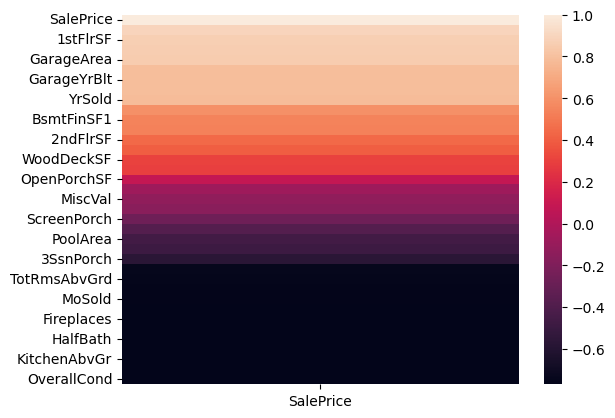

In [24]:
# def plot_correlation_heatmap(target_col: str or None):

#     corr_data: pd.DataFrame
    
#     if target_col is None:
corr_price = data.corr(method='pearson')['SalePrice'].sort_values(ascending=False)
#     elif isinstance(target_col, str):
#         corr_data = data.corr(method='pearson')

sns.heatmap(corr_price.to_frame())
plt.show()

# plot_correlation_heatmap('SalePrice')

## Correlation between Predictor Variables (Multicollinearity)

In [25]:
corr_df = data.corr(method='pearson').sort_values(by='SalePrice')
#sns.heatmap(corr_df,cmap='BrBG')
#plt.show()
corr_df

C:\Users\Mark\AppData\Local\Temp\ipykernel_11100\4134069938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = data.corr(method='pearson').sort_values(by='SalePrice')


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallCond,0.149717,-0.059074,-0.553535,0.998447,1.000000,-0.981344,-0.981171,-0.124091,-0.404041,0.077898,...,-0.116084,0.172321,0.379699,0.765678,0.436195,0.656398,0.147744,0.996290,-0.981384,-0.769322
BsmtHalfBath,0.150640,-0.061640,-0.554524,0.998995,0.999400,-0.984173,-0.984411,-0.119614,-0.403244,0.076676,...,-0.116335,0.173597,0.377496,0.766478,0.433651,0.657437,0.143800,0.996645,-0.984610,-0.769220
KitchenAbvGr,0.152157,-0.060948,-0.554256,0.999028,0.999407,-0.983758,-0.983991,-0.119453,-0.403490,0.076177,...,-0.116885,0.174002,0.377733,0.766196,0.433565,0.657252,0.143862,0.996691,-0.984176,-0.769095
BsmtFullBath,0.150468,-0.059834,-0.552247,0.999010,0.999281,-0.983851,-0.984141,-0.118041,-0.395262,0.078622,...,-0.114534,0.175038,0.376910,0.766139,0.433929,0.658333,0.144252,0.996538,-0.984369,-0.766912
HalfBath,0.153415,-0.060851,-0.553829,0.999083,0.999278,-0.983857,-0.984147,-0.116924,-0.403582,0.075832,...,-0.115177,0.176530,0.376443,0.766191,0.434535,0.657666,0.143114,0.996567,-0.984390,-0.766698
BedroomAbvGr,0.150494,-0.053963,-0.551097,0.998979,0.999259,-0.982684,-0.982918,-0.116726,-0.404935,0.076703,...,-0.114477,0.176229,0.378326,0.765681,0.435047,0.658387,0.145019,0.996578,-0.983085,-0.765635
Fireplaces,0.150202,-0.056947,-0.550600,0.999192,0.999252,-0.983724,-0.983996,-0.115288,-0.399247,0.076674,...,-0.113581,0.177149,0.376884,0.766089,0.436643,0.658735,0.144835,0.996591,-0.984237,-0.763836
FullBath,0.152804,-0.057830,-0.552345,0.999343,0.999225,-0.983150,-0.983476,-0.115035,-0.402432,0.075153,...,-0.113043,0.178608,0.375116,0.766570,0.433782,0.657817,0.143433,0.996689,-0.983821,-0.762971
MoSold,0.150100,-0.055665,-0.550562,0.996256,0.996290,-0.977813,-0.978041,-0.117105,-0.401785,0.073675,...,-0.111484,0.181755,0.372382,0.765023,0.433650,0.651870,0.144954,1.000000,-0.978305,-0.761506
GarageCars,0.150532,-0.055359,-0.551290,0.999382,0.999136,-0.982893,-0.983256,-0.112461,-0.399860,0.075030,...,-0.112027,0.178920,0.375021,0.766476,0.434146,0.657383,0.142624,0.996639,-0.983628,-0.760860


# Modeling

## Imports

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


## Split Data into Train and Test Set

In [27]:
seed = 6565

X = data.loc[:'SalePrice']
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
 

## Preprocessing Pipeline

In [28]:
import regex as re

def scale_encode(df: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler() 
   # encoder = OneHotEncoder() 
    
    X_num = df.select_dtypes(exclude='object')  
                                                                 
    X_scaled = scaler.fit_transform(X_num) 

    #X_encoded = pd.get_dummies(df, prefix='enc_') 

   # X_dummies= X_encoded.filter(regex='enc_', axis=1) 

    X_final = pd.DataFrame(X_scaled,columns=X_num.columns.to_list(), index=X_num.index)#.join(X_dummies)

    return X_final

    


In [29]:
X_train_final = scale_encode(X_train)
check_missing(X_train_final)

Series([], dtype: int64)

# Baseline Model (Linear Regression)    

In [30]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_final,y_train)

LinearRegression()

In [31]:
X_test_final = scale_encode(X_test)
y_pred = linear_reg.predict(X_test_final)


The R^2 value for this model is : 0.9868777830511517


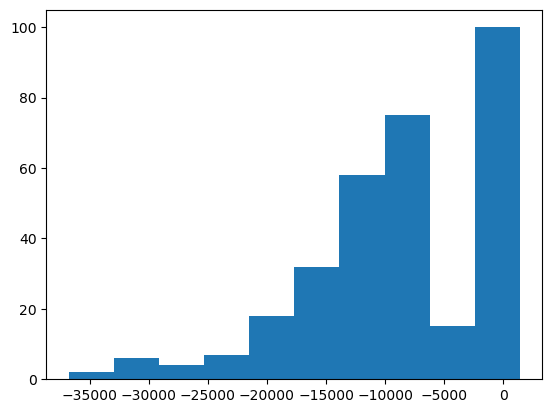

In [32]:
R2 = linear_reg.score(X_test_final, y_test)
print(f"The R^2 value for this model is : {R2}")

residuals = y_test-y_pred
plt.hist(residuals)
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

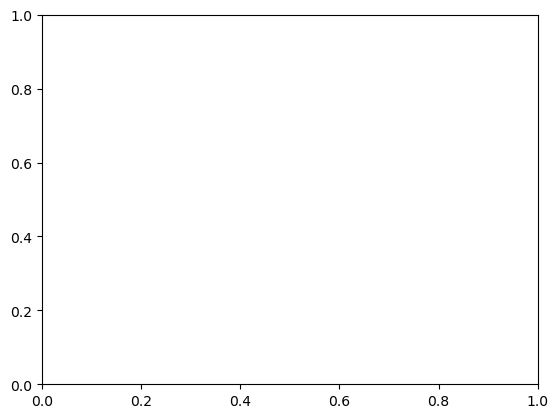

In [33]:
y_pred_m = np.maximum(0, y_pred)
plt.plot(y_test, kind='line')
plt.plot(y_pred, kind='line')
plt.show()

# Baseline Model (Decision Tree)

In [ ]:
dt = DecisionTreeRegressor(criterion='squared_error')

dt.fit(X_train_final, y_train)

: 

In [ ]:
dt.feature_names_in_

: 

In [ ]:
dt.predict(X_test)

: 